In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Escaladores
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Modelo de predicción (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = datasets.load_wine()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.shape

(178, 14)

En este ejercicio no hace falta limpiar los datos por que ya utilizamos este conjunto de datos en un ejercicio anterior y están limpios.

## Seleccion de datos


In [5]:
x = df.drop("target", axis=1)
y = df["target"]

### Division de datos

In [6]:
# Conjunto de entrenamiento,  conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=1)

# Conjunto de entrenamiento,  conjunto de testeo
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

x_plot = x_train.copy()

In [7]:
# Utilizamos el Standard Scaler para escalar los registros entre valores de -1 y 1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

In [8]:
# LDA
lda = LDA(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_val = lda.transform(x_val)
x_test = lda.transform(x_test)

In [9]:
lda.explained_variance_ratio_

array([0.65175151, 0.34824849])

Utilizando 2 componentes en el LDA conseguismos una precisión del 100%

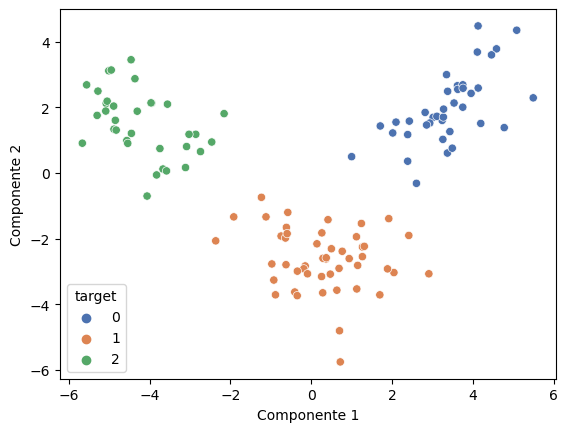

In [10]:
x_plot = pd.DataFrame(x_train, columns=["Componente 1", "Componente 2"], index=x_plot.index)
x_plot["y"] = 0
x_plot["target"] = y_train

sns.scatterplot(x= "Componente 1", y="Componente 2", data=x_plot, hue="target", palette="deep")
plt.show()

Si observamos el gráfico superior vemos como las variables de nuestras diferentes clases objetivos están muy bien separadas en 3 grupos diferentes.
Por ello decido utilizar el modelo KNN para predecir futuros resultados.

In [11]:
# Selección de la k (numero de vecinos a seleccionar)
k = 1

# Creacion del modelo
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
# Validación de resultados
y_pred = knn.predict(x_val)

In [13]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.83      0.91         6

    accuracy                           0.96        27
   macro avg       0.97      0.94      0.95        27
weighted avg       0.97      0.96      0.96        27



A la hora de predecir resultados con nuestro conjunto de validación obtenemos una precisión total del 96%, habiendose equivacado solo en 1 valor.

In [14]:
# Prediccion de resultados futuros
y_pred = knn.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



Como podemmos observar en la tabla superior, nuestro modelo final obtiene una precisión del 100%, es decir, a la hora de querer clasificar vinos con los futuros datos que nos proporcionen, nuestro modelo será capaz de predecirlos con total exactitud. También podemos guardar nuestro modelo para por ejemplo poder enviarselo a la compañia de vinos y que ellos mismos sean capaces de clasificarlos sin nuestra ayuda.

In [ ]:
import pickle

# Guardar modelo en PC
pickle.dump(knn, open("Modelo_vinos.sav", "wb"))

#Para cargar el modelo guardado anteriormente, podemos hacerlo de la siguiente manera:
modelo_knn = pickle.load(open("Modelo_vinos.sav", "rb"))

# Con esto en nuestra variable 'modelo_knn' tenemos el podemo cargado y listo para usar.